# Implementation of AdaBoost ML model

 AdaBoost or Adaptive Boosting is one of the ensemble boosting classifier proposed by Yoav Freund and Robert Schapire in 1996.

It combines multiple weak classifiers to increase the accuracy of classifiers.

AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier.

The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations.

Any machine learning algorithm can be used as base classifier if it accepts weights on the training set.

In [3]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('Iris.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
iris = pd.read_csv('Iris.csv')

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = iris['Species']

y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

In [10]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(X_test)

## Create AdaBoost Classifier
The most important parameters are base_estimator, n_estimators and learning_rate.

base_estimator is the learning algorithm to use to train the weak models. This will almost always not needed to be changed because by far the most common learner to use with AdaBoost is a decision tree – this parameter’s default argument.

n_estimators is the number of models to iteratively train.

learning_rate is the contribution of each model to the weights and defaults to 1. Reducing the learning rate will mean the weights will be increased or decreased to a small degree, forcing the model train slower (but sometimes resulting in better performance scores).

loss is exclusive to AdaBoostRegressor and sets the loss function to use when updating weights. This defaults to a linear loss function however can be changed to square or exponential.

In [13]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score


# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.9555555555555556


### Further evaluation with SVC base estimator 

In [15]:
# load required classifier
from sklearn.ensemble import AdaBoostClassifier

# import Support Vector Classifier
from sklearn.svm import SVC

# import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# Create SVM classifier with probability support
svc = SVC(probability=True, kernel='linear', random_state=0)

# create adaboost classifier object - FIXED: use 'estimator' instead of 'base_estimator'
abc = AdaBoostClassifier(n_estimators=50, estimator=svc, learning_rate=1, random_state=0)

# train adaboost classifier
model2 = abc.fit(X_train, y_train)

# predict the response for test dataset
y_pred = model2.predict(X_test)

# calculate and print model accuracy
print("Model Accuracy with SVC Base Estimator:", accuracy_score(y_test, y_pred))

Model Accuracy with SVC Base Estimator: 0.9333333333333333


## Here is a Multi Class ROC curve for our AdaBoost Classifier

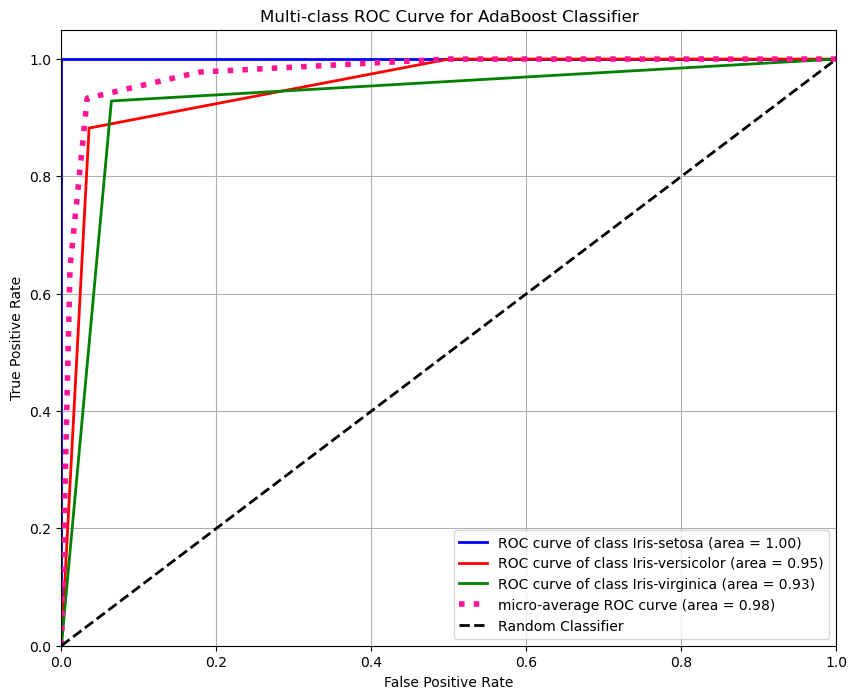

AUC Scores:
Iris-setosa: 1.0000
Iris-versicolor: 0.9527
Iris-virginica: 0.9320
Micro-average: 0.9778


In [30]:
# ROC Curve for AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Since we have multiple classes (3 iris species), we need to binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities for each class
y_score = model2.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Plot each class
colors = ['blue', 'red', 'green']
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot random classifier line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve for AdaBoost Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores
print("AUC Scores:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {roc_auc[i]:.4f}")
print(f"Micro-average: {roc_auc['micro']:.4f}")